In [24]:
LAMBDA21 = 0.21127 #m, 0.21106114
C = 3e8 #m/s

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from colossus.cosmology import cosmology 

In [29]:
cosmo = cosmology.setCosmology('WMAP7') 

## LOS coordinates

$$y(z, B) = \frac{\lambda_{21} (1+z)^2}{H(z)} B$$
- $y$ in Mpc
- $B$ in Hz (may need Mhz->Hz)
- $\lambda_{21}$ in km (may need m->km)
- since $H(z)$ in km/s/Mpc

In [30]:
def y_in_Mpc(bandwidth, z):
    """
    Convert bandwidth in MHz to width in Mpc
    """
    return bandwidth * 1e3 * (1 + z)**2 * LAMBDA21 / cosmo.Hz(z)

$$ y(z) \times \Delta \nu = r_\|$$

another way: $\Delta \nu \rightarrow \Delta z \rightarrow \Delta \chi$

In [31]:
nu0 = C/LAMBDA21/1e6
nu0

1419.9839068490555

In [32]:
def z_to_nu(z):
    """
    Convert redshift to frequency in MHz
    """
    nu0 = C/LAMBDA21/1e6
    return nu0/(1+z)

In [33]:
def nu_to_z(nu):
    """
    Convert frequency in MHz to redshift
    """
    nu0 = C/LAMBDA21/1e6
    return nu0/nu - 1

In [34]:
def bandwidth_to_dchi(bandwidth, z_min):
    """
    Convert bandwidth in MHz to comoving distance in Mpc, giving zmin
    """
    nu1 = z_to_nu(z_min)
    nu2 = nu1 - bandwidth
    z_max = nu_to_z(nu2)
    return cosmo.comovingDistance(z_min, z_max)


compare 2 results

In [35]:
z = np.linspace(0, 10, 1000)

In [36]:
bandwidth = 6 #MHz

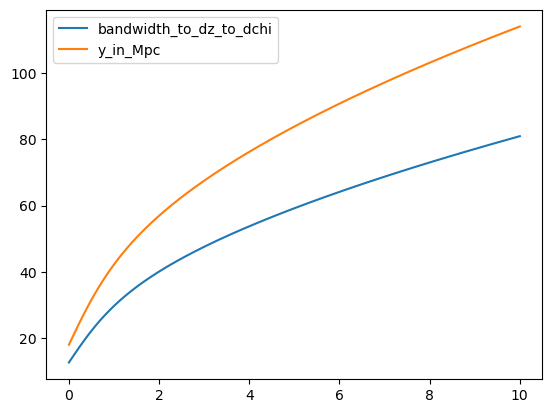

In [37]:
plt.plot(z, bandwidth_to_dchi(bandwidth, z), label="bandwidth_to_dz_to_dchi")
plt.plot(z, y_in_Mpc(bandwidth, z), label="y_in_Mpc")
plt.legend()

### bandwidth to kz_min

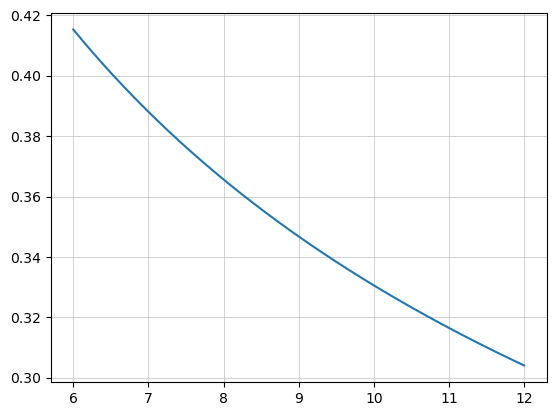

In [41]:
bandwidth = 1
z = np.linspace(6, 12, 1000)

dchi = y_in_Mpc(bandwidth, z)
kz = 2*np.pi/dchi

plt.plot(z, kz, label="kz")
plt.grid( which="major", linewidth=0.5, color="0.75" )
plt.grid( which="minor", linewidth=0.25, color="0.75" )
